In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
np.set_printoptions(precision=2)

fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']

In [8]:
fruits.head() # Feature name: 'height', 'width', 'mass', 'color_socre' will be used as x

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']
X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)


<IPython.core.display.Javascript object>


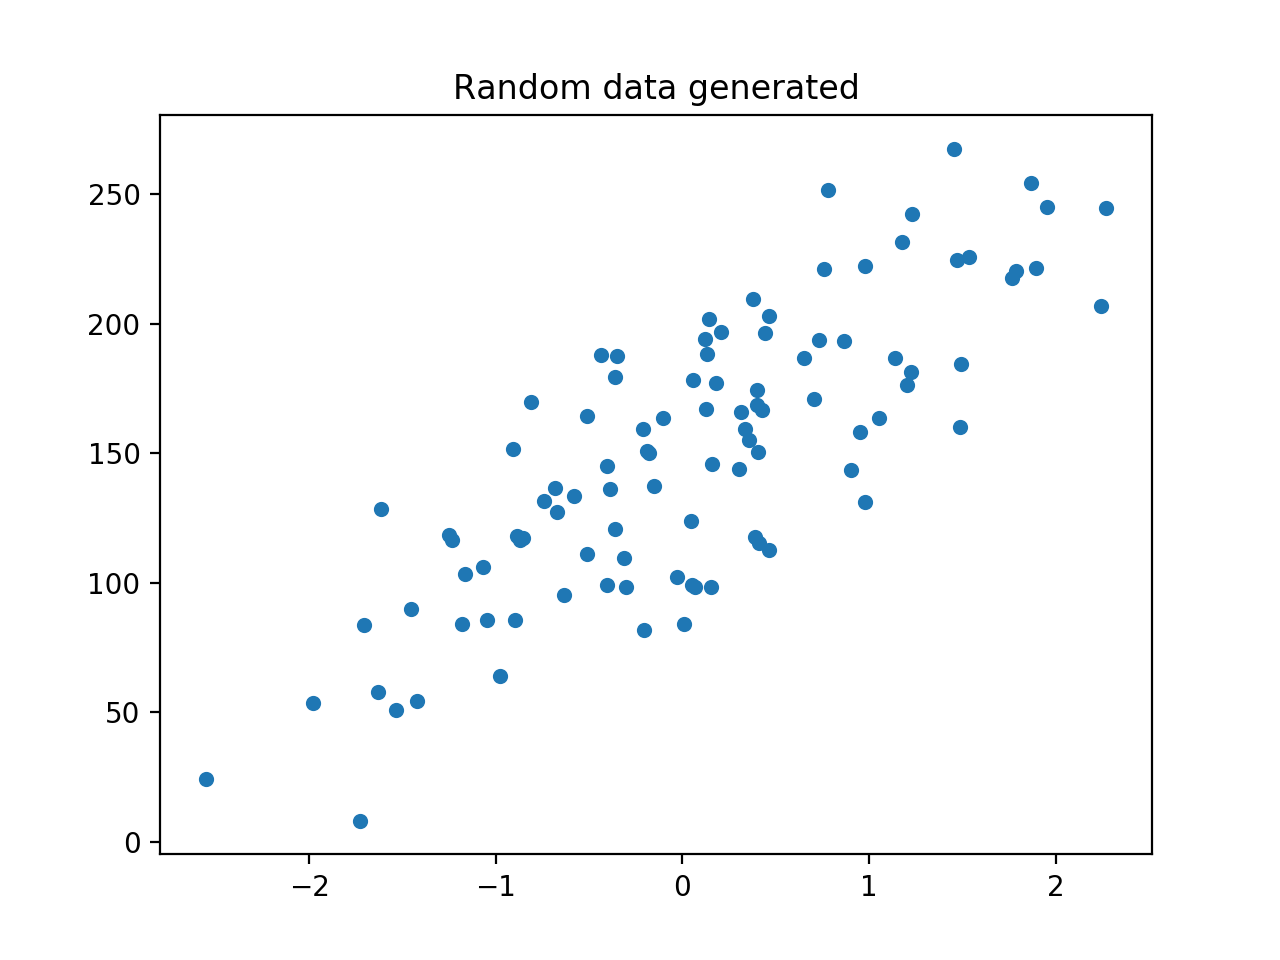

In [25]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Random data generated')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=20)
plt.show()

<IPython.core.display.Javascript object>


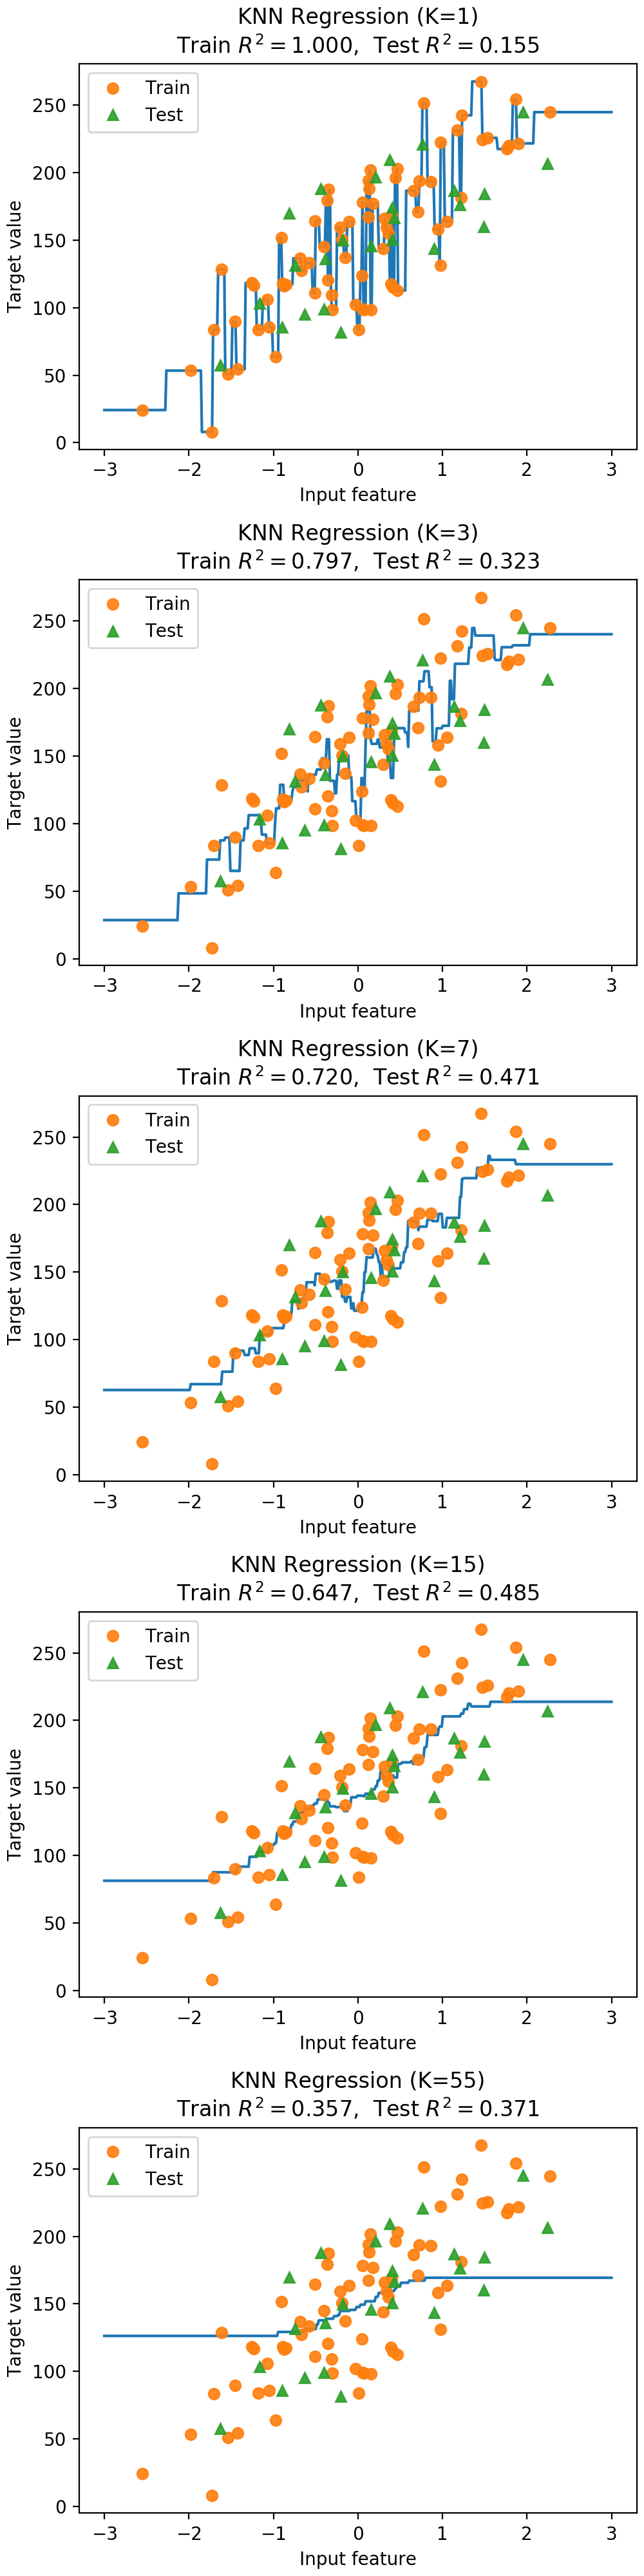

In [23]:
# plot k-NN regression on sample dataset for different values of K
%matplotlib notebook
from sklearn.neighbors import KNeighborsRegressor

fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


<IPython.core.display.Javascript object>


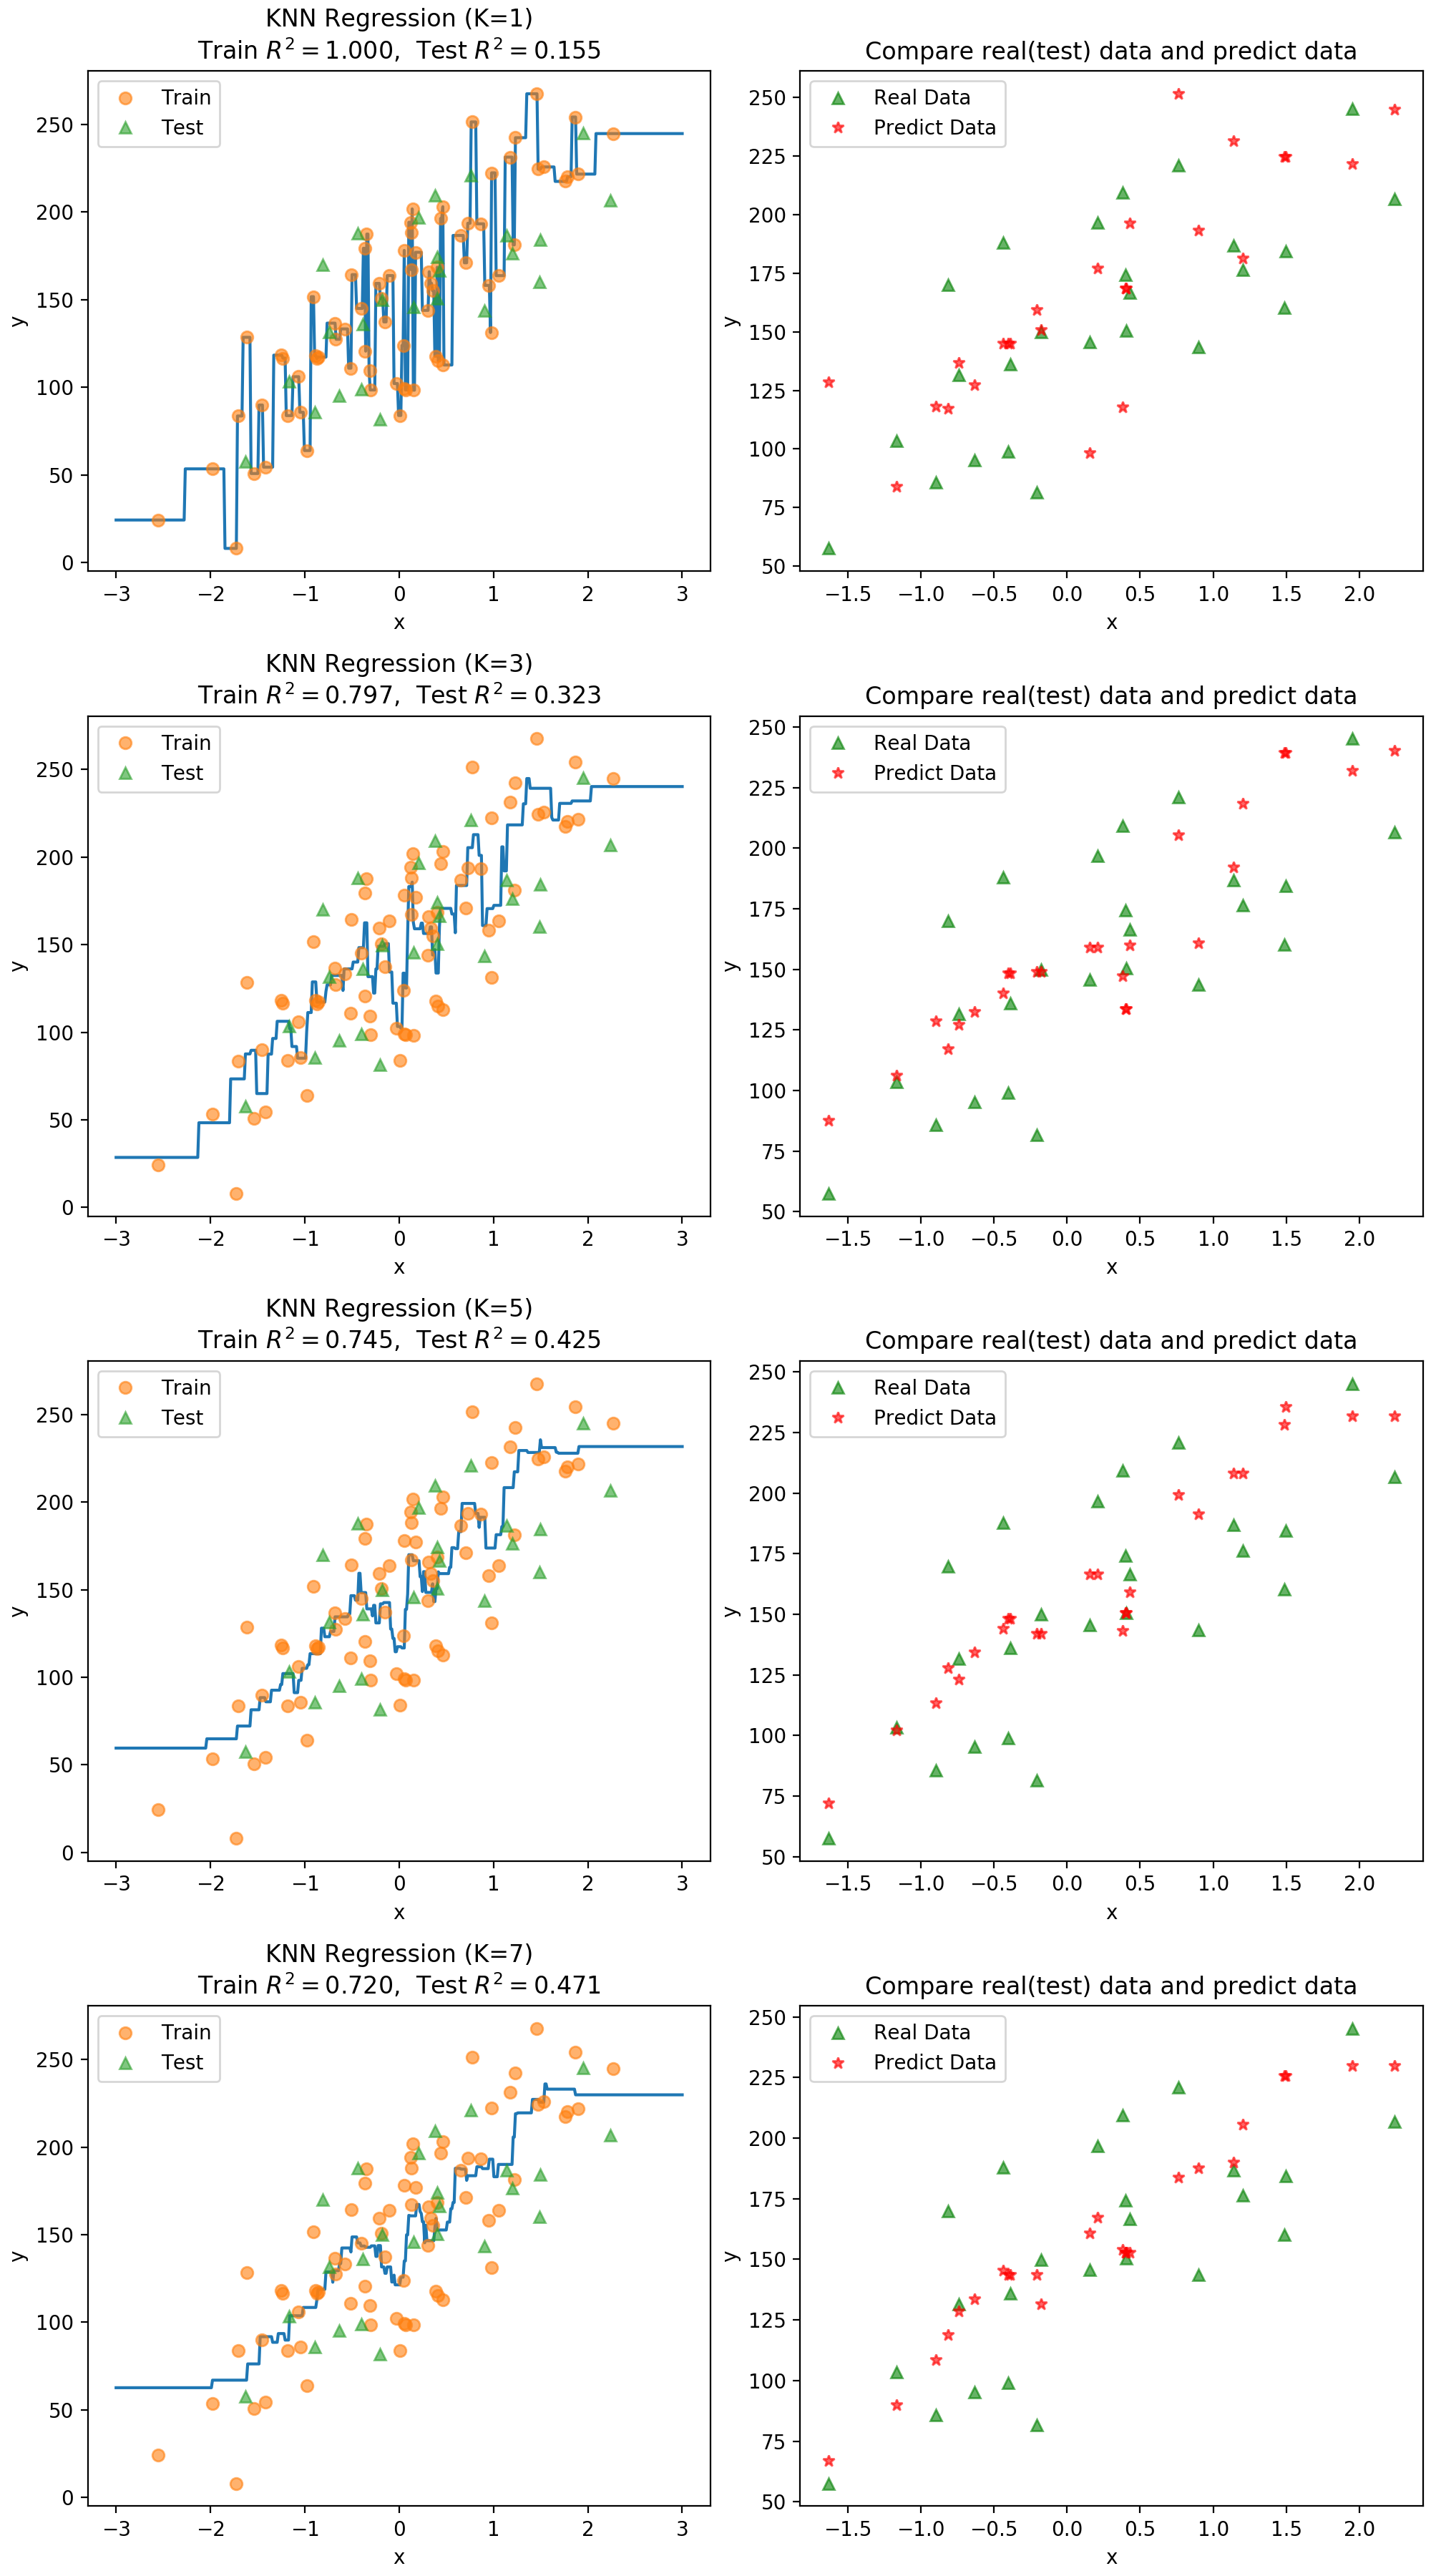

In [86]:
%matplotlib notebook
from sklearn.neighbors import KNeighborsRegressor

fig, subaxes = plt.subplots(4, 2, figsize=(10,18))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for i, K in zip(range(0,8,2), [1, 3, 5, 7, 9, 11, 13, 15]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    subaxes.flat[i].plot(X_predict_input, y_predict_output)
    subaxes.flat[i].plot(X_train, y_train, 'o', alpha=0.6, label='Train')
    subaxes.flat[i].plot(X_test, y_test, '^', alpha=0.6, label='Test')
    subaxes.flat[i].set_xlabel('x')
    subaxes.flat[i].set_ylabel('y')
    subaxes.flat[i].set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    subaxes.flat[i].legend()
    
    
    y_predict = knnreg.predict(X_test)
    subaxes.flat[i+1].plot(X_test, y_test, '^',  alpha=0.6, color = 'green', label='Real Data')
    subaxes.flat[i+1].plot(X_test, y_predict, '*',  alpha=0.6,color = 'red', label='Predict Data')
    subaxes.flat[i+1].set_xlabel('x')
    subaxes.flat[i+1].set_ylabel('y')
    subaxes.flat[i+1].set_title('Compare real(test) data and predict data')
    subaxes.flat[i+1].legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    
plt.savefig('./"A"')

<IPython.core.display.Javascript object>


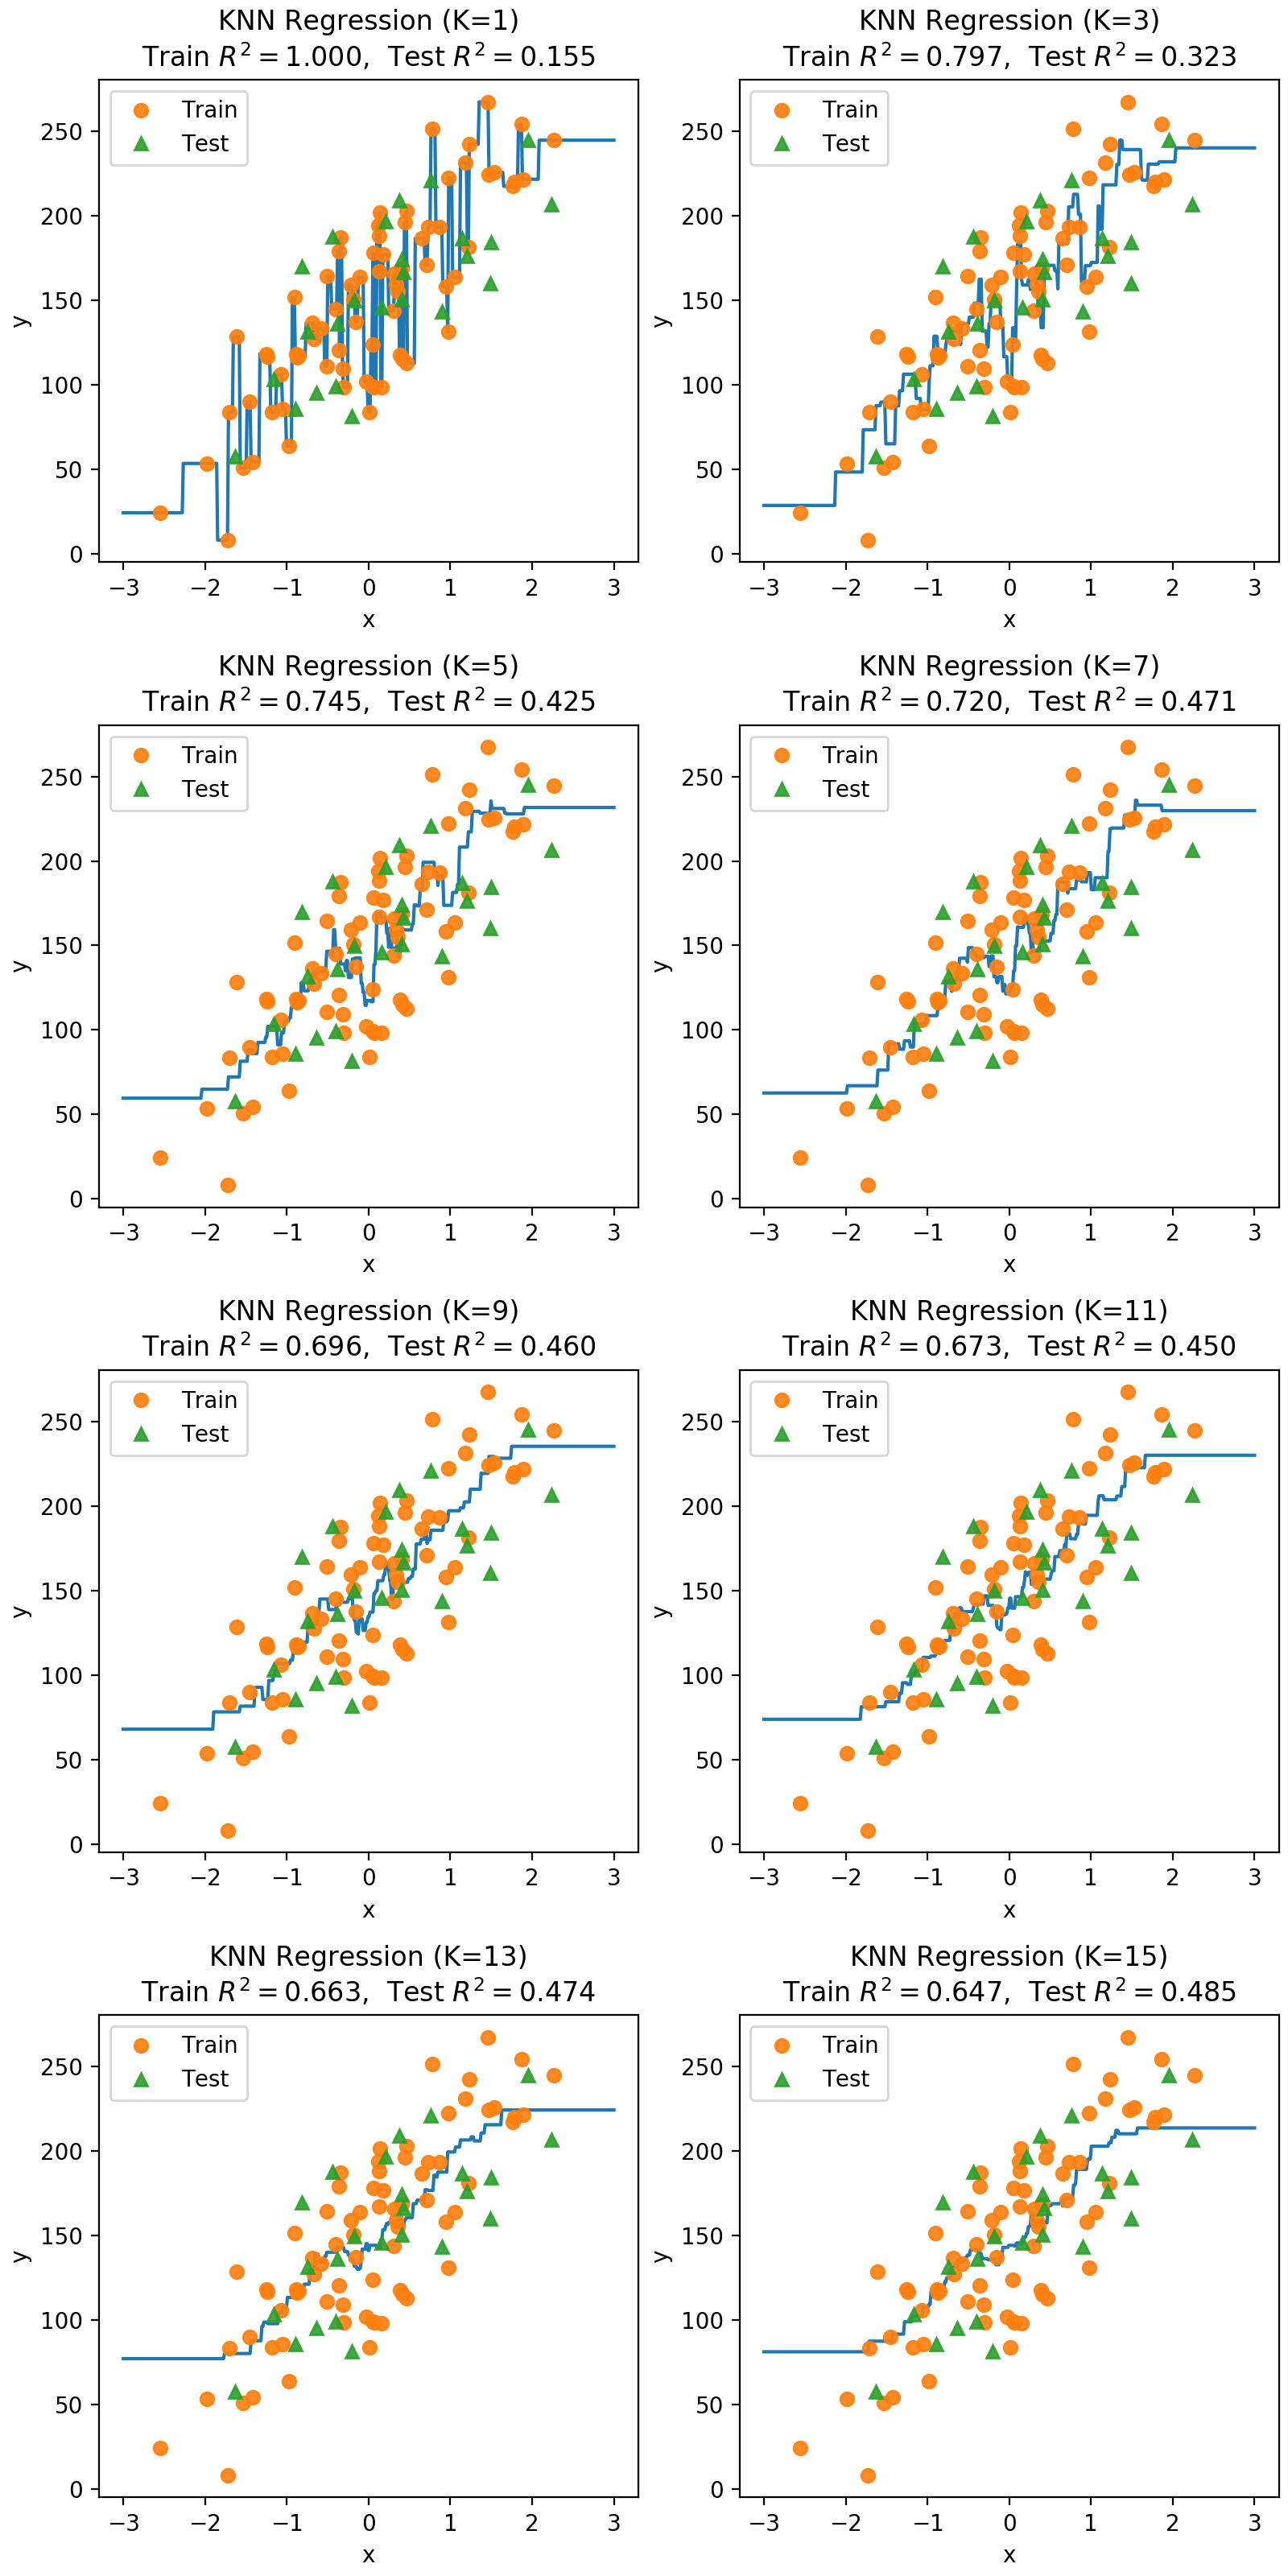

In [47]:
%matplotlib notebook
from sklearn.neighbors import KNeighborsRegressor

fig, subaxes = plt.subplots(4, 2, figsize=(8,16))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for thisaxis, K in zip(subaxes.flat, [1, 3, 5, 7, 9, 11, 13, 15]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('x')
    thisaxis.set_ylabel('y')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [52]:
subaxes.flat[0].scatter(X_R1, y_R1, marker= 'o', s=20)


<IPython.core.display.Javascript object>


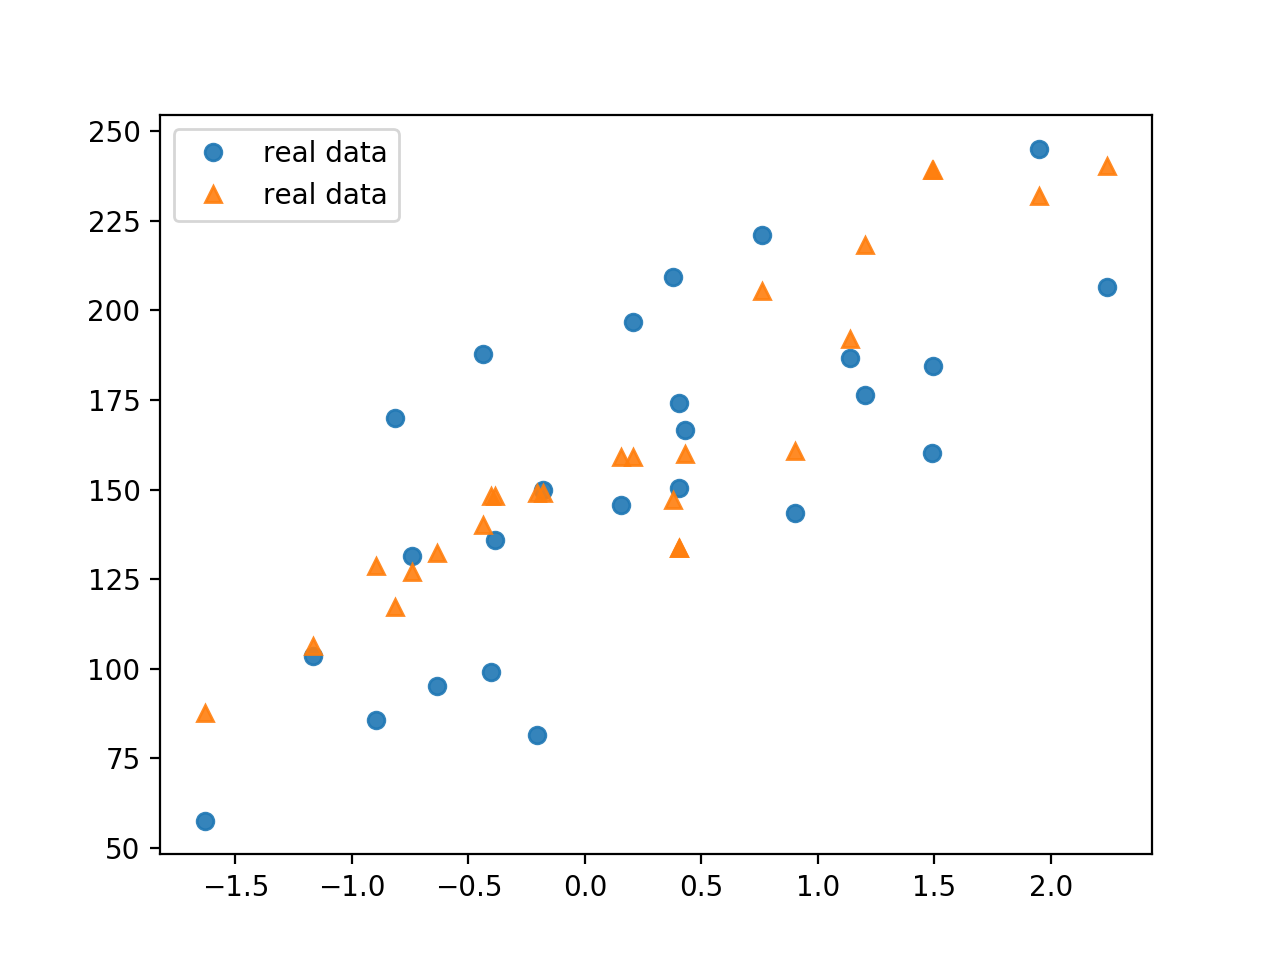

In [69]:
plt.figure()
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors = 3).fit(X_train, y_train)
train_score = knnreg.score(X_train, y_train)
test_score = knnreg.score(X_test, y_test)
y_predict = knnreg.predict(X_test)
plt.plot(X_test, y_test, 'o', alpha=0.9, label='real data')
plt.plot(X_test, y_predict, '^', alpha=0.9, label='real data')
plt.legend()
plt.show()